# EDA before SNP selection

In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(color_codes=True)
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(13,10)})
pd.set_option('display.max_columns', 999)

In [2]:
betas = pd.read_csv('/Carnegie/DPB/Data/Shared/Labs/Moi/Everyone/deepselection/randomForest/betas_woNAs_55climvars_rFit.txt', sep='\t')
betas.rename(columns={'clim-bio18.assoc_y':'clim-bio18'}, inplace=True)
betas.drop(['clim-bio18.assoc_x'],axis=1, inplace=True)

In [3]:
betas

,rs,rFitness2_thp,rFitness2_mlp,rFitness2_thi,rFitness2_mli,clim-bio18,clim-bio19,clim-tmin12,clim-tmin10,clim-tmax8,clim-tmin11,clim-tmax9,clim-bio11,clim-tmax7,clim-bio10,clim-tmax6,clim-bio13,clim-tmax5,clim-bio12,clim-tmax4,clim-tmax3,clim-prec11,clim-bio15,clim-tmax2,clim-bio14,clim-prec10,clim-tmax1,clim-bio17,clim-prec12,clim-bio16,clim-prec4,clim-prec5,clim-prec6,clim-prec7,clim-tmin9,clim-prec1,clim-tmin8,clim-prec2,clim-bio9,clim-prec3,clim-bio8,clim-bio6,clim-tmin4,clim-bio7,clim-tmin5,clim-tmin6,clim-bio4,clim-tmin7,clim-bio5,clim-bio2,clim-prec9,clim-tmin1,clim-tmax12,clim-bio3,clim-prec8,clim-tmax11,clim-tmin2,clim-tmax10,clim-bio1,clim-tmin3
0,1_540,0.051657,-0.007652,-0.005884,-0.104847,-26.764110,-0.733607,13.74579,7.374941,10.816520,9.002601,11.282940,16.53593,9.526561,6.105769,5.893443,-3.630517,4.787279,-31.12248,9.853168,17.29063,0.548707,-0.131542,20.20957,-3.766551,-0.402033,18.23991,-8.378389,-0.806510,-11.61735,0.012059,-0.151088,-5.872163,-11.043580,7.085277,-0.939786,5.284600,0.794452,30.50134,-0.546028,-7.512610,16.33209,6.336933,-6.894625,2.628310,2.021674,-398.0211,3.597967,9.345208,3.549259,-2.759931,16.01266,14.84119,1.902506,-9.956573,12.83378,16.69604,10.133750,10.281870,13.15253
1,1_542,0.004111,0.048491,0.073666,-0.077117,-51.331820,2.313131,20.81942,15.659550,28.453540,17.186360,27.836360,26.56558,27.097470,18.690400,20.570200,-7.069697,16.222730,-68.26061,23.098480,31.54656,-0.763131,4.729798,33.88586,-10.895450,-3.549495,29.63434,-27.600510,-2.157576,-17.57121,-0.176263,-2.549495,-10.784850,-19.620200,15.438890,0.487879,13.624750,3.767677,67.15520,-1.459596,-17.300510,24.87831,16.018180,2.889394,9.864141,9.850000,-321.5116,11.864650,27.677780,9.156566,-10.707580,24.40822,26.18636,2.790404,-20.747980,25.62172,25.35387,24.542930,21.646090,23.29937
2,1_597,0.050162,1.499608,0.010532,0.303121,-0.867719,-32.615580,-62.81951,-31.458760,1.288493,-47.875050,-7.207536,-63.50992,7.148982,1.292363,9.530754,-7.756517,7.528717,-78.49318,-11.677900,-46.30816,-11.789310,0.363748,-60.71517,-2.464155,-7.251731,-60.49470,-11.890630,-12.480860,-27.37383,-5.874745,-3.811711,-1.774440,4.776782,-20.284220,-11.718530,-8.491242,-8.633096,-62.78980,-9.396334,19.070670,-70.89856,-18.339710,77.943890,-5.378004,-0.392464,2556.7040,-0.674236,6.968737,8.806008,-7.189511,-71.36544,-54.48136,-4.023320,-3.349695,-44.25173,-71.08244,-25.833300,-28.211220,-52.01992
3,1_603,0.035322,1.334941,0.002544,0.272688,-4.071614,-34.889700,-60.00884,-30.593440,1.184230,-45.588590,-6.255566,-60.55849,6.220130,0.128479,7.681911,-7.312245,5.582839,-82.63627,-11.948050,-44.42294,-12.459370,1.098794,-57.80427,-2.896753,-7.768460,-57.37421,-13.188310,-13.473010,-26.82087,-5.468460,-2.560019,-1.429499,3.633952,-20.367440,-12.504640,-9.094156,-9.129406,-63.28537,-9.406215,15.744810,-68.04162,-18.767530,74.203710,-6.913358,-2.558998,2393.5660,-2.204638,6.085993,9.265492,-7.989610,-68.50913,-51.30677,-3.617904,-4.081540,-40.89360,-68.02600,-23.455380,-27.367260,-50.15808
4,1_607,0.072287,-0.493372,0.031047,-0.144275,-44.277610,-2.610429,10.14773,3.727366,17.148520,4.291667,15.285790,13.99949,16.843050,8.247444,8.656186,-4.765849,2.889315,-56.33410,8.696830,17.76093,-1.626278,3.165644,20.59842,-8.595859,-3.763804,16.67894,-21.066210,-3.037832,-16.20731,1.571830,1.901585,-6.861708,-17.342280,4.956033,-0.957566,4.613753,1.167178,51.33128,-0.026074,-17.939670,12.76108,2.468814,4.120143,-2.437372,-0.658742,-219.2459,3.002812,16.790130,7.817485,-8.917945,12.28516,12.84714,2.056237,-18.441210,11.54985,12.81555,9.988241,9.190232,10.09397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307135,5_26972045,0.088650,0.643438,-0.025022,0.288758,-19.230640,-39.643810,-47.12834,-27.516970,3.055295,-35.695510,-2.189132,-46.35191,4.959152,-2.349076,3.664344,-3.940378,

## Correlation matrix of climate-related selection coefficients

In [4]:
betas4corr = betas.iloc[:,5:].copy()
betas4corr

,clim-bio18,clim-bio19,clim-tmin12,clim-tmin10,clim-tmax8,clim-tmin11,clim-tmax9,clim-bio11,clim-tmax7,clim-bio10,clim-tmax6,clim-bio13,clim-tmax5,clim-bio12,clim-tmax4,clim-tmax3,clim-prec11,clim-bio15,clim-tmax2,clim-bio14,clim-prec10,clim-tmax1,clim-bio17,clim-prec12,clim-bio16,clim-prec4,clim-prec5,clim-prec6,clim-prec7,clim-tmin9,clim-prec1,clim-tmin8,clim-prec2,clim-bio9,clim-prec3,clim-bio8,clim-bio6,clim-tmin4,clim-bio7,clim-tmin5,clim-tmin6,clim-bio4,clim-tmin7,clim-bio5,clim-bio2,clim-prec9,clim-tmin1,clim-tmax12,clim-bio3,clim-prec8,clim-tmax11,clim-tmin2,clim-tmax10,clim-bio1,clim-tmin3
0,-26.764110,-0.733607,13.74579,7.374941,10.816520,9.002601,11.282940,16.53593,9.526561,6.105769,5.893443,-3.630517,4.787279,-31.12248,9.853168,17.29063,0.548707,-0.131542,20.20957,-3.766551,-0.402033,18.23991,-8.378389,-0.806510,-11.61735,0.012059,-0.151088,-5.872163,-11.043580,7.085277,-0.939786,5.284600,0.794452,30.50134,-0.546028,-7.512610,16.33209,6.336933,-6.894625,2.628310,2.021674,-398.0211,3.597967,9.345208,3.549259,-2.759931,16.01266,14.84119,1.902506,-9.956573,12.83378,16.69604,10.133750,10.281870,13.15253
1,-51.331820,2.313131,20.81942,15.659550,28.453540,17.186360,27.836360,26.56558,27.097470,18.690400,20.570200,-7.069697,16.222730,-68.26061,23.098480,31.54656,-0.763131,4.729798,33.88586,-10.895450,-3.549495,29.63434,-27.600510,-2.157576,-17.57121,-0.176263,-2.549495,-10.784850,-19.620200,15.438890,0.487879,13.624750,3.767677,67.15520,-1.459596,-17.300510,24.87831,16.018180,2.889394,9.864141,9.850000,-321.5116,11.864650,27.677780,9.156566,-10.707580,24.40822,26.18636,2.790404,-20.747980,25.62172,25.35387,24.542930,21.646090,23.29937
2,-0.867719,-32.615580,-62.81951,-31.458760,1.288493,-47.875050,-7.207536,-63.50992,7.148982,1.292363,9.530754,-7.756517,7.528717,-78.49318,-11.677900,-46.30816,-11.789310,0.363748,-60.71517,-2.464155,-7.251731,-60.49470,-11.890630,-12.480860,-27.37383,-5.874745,-3.811711,-1.774440,4.776782,-20.284220,-11.718530,-8.491242,-8.633096,-62.78980,-9.396334,19.070670,-70.89856,-18.339710,77.943890,-5.378004,-0.392464,2556.7040,-0.674236,6.968737,8.806008,-7.189511,-71.36544,-54.48136,-4.023320,-3.349695,-44.25173,-71.08244,-25.833300,-28.211220,-52.01992
3,-4.071614,-34.889700,-60.00884,-30.593440,1.184230,-45.588590,-6.255566,-60.55849,6.220130,0.128479,7.681911,-7.312245,5.582839,-82.63627,-11.948050,-44.42294,-12.459370,1.098794,-57.80427,-2.896753,-7.768460,-57.37421,-13.188310,-13.473010,-26.82087,-5.468460,-2.560019,-1.429499,3.633952,-20.367440,-12.504640,-9.094156,-9.129406,-63.28537,-9.406215,15.744810,-68.04162,-18.767530,74.203710,-6.913358,-2.558998,2393.5660,-2.204638,6.085993,9.265492,-7.989610,-68.50913,-51.30677,-3.617904,-4.081540,-40.89360,-68.02600,-23.455380,-27.367260,-50.15808
4,-44.277610,-2.610429,10.14773,3.727366,17.148520,4.291667,15.285790,13.99949,16.843050,8.247444,8.656186,-4.765849,2.889315,-56.33410,8.696830,17.76093,-1.626278,3.165644,20.59842,-8.595859,-3.763804,16.67894,-21.066210,-3.037832,-16.20731,1.571830,1.901585,-6.861708,-17.342280,4.956033,-0.957566,4.613753,1.167178,51.33128,-0.026074,-17.939670,12.76108,2.468814,4.120143,-2.437372,-0.658742,-219.2459,3.002812,16.790130,7.817485,-8.917945,12.28516,12.84714,2.056237,-18.441210,11.54985,12.81555,9.988241,9.190232,10.09397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307135,-19.230640,-39.643810,-47.12834,-27.516970,3.055295,-35.695510,-2.189132,-46.35191,4.959152,-2.349076,3.664344,-3.940378,1.315195,-111.42590,-5.976093,-27.64698,-17.896960,9.191918,-42.28491,-7.877970,-15.328180,-44.08338,-27.294590,-16.448520,-17.62716,-0.889484,0.176445,-3.332136,-4.045908,-20.913760,-14.078030,-11.441480,-9.335949,-46.64727,-4.814755,0.981739,-55.04400,-12.780800,60.081330,-7.450279,-6.876797,1688.6820,-7.058008,4.961132,10.972570,-15.42710

In [5]:
betas4corr = betas4corr.reindex(sorted(betas4corr.columns), axis=1)

In [6]:
betas4corr.columns

Index(['clim-bio1', 'clim-bio10', 'clim-bio11', 'clim-bio12', 'clim-bio13',
       'clim-bio14', 'clim-bio15', 'clim-bio16', 'clim-bio17', 'clim-bio18',
       'clim-bio19', 'clim-bio2', 'clim-bio3', 'clim-bio4', 'clim-bio5',
       'clim-bio6', 'clim-bio7', 'clim-bio8', 'clim-bio9', 'clim-prec1',
       'clim-prec10', 'clim-prec11', 'clim-prec12', 'clim-prec2', 'clim-prec3',
       'clim-prec4', 'clim-prec5', 'clim-prec6', 'clim-prec7', 'clim-prec8',
       'clim-prec9', 'clim-tmax1', 'clim-tmax10', 'clim-tmax11', 'clim-tmax12',
       'clim-tmax2', 'clim-tmax3', 'clim-tmax4', 'clim-tmax5', 'clim-tmax6',
       'clim-tmax7', 'clim-tmax8', 'clim-tmax9', 'clim-tmin1', 'clim-tmin10',
       'clim-tmin11', 'clim-tmin12', 'clim-tmin2', 'clim-tmin3', 'clim-tmin4',
       'clim-tmin5', 'clim-tmin6', 'clim-tmin7', 'clim-tmin8', 'clim-tmin9'],
      dtype='object')

In [7]:
betas4corr.columns = ['clim-bio01', 'clim-bio10', 'clim-bio11', 'clim-bio12', 'clim-bio13',
       'clim-bio14', 'clim-bio15', 'clim-bio16', 'clim-bio17', 'clim-bio18',
       'clim-bio19', 'clim-bio02', 'clim-bio03', 'clim-bio04', 'clim-bio05',
       'clim-bio06', 'clim-bio07', 'clim-bio08', 'clim-bio09', 'clim-prec01',
       'clim-prec10', 'clim-prec11', 'clim-prec12', 'clim-prec02', 'clim-prec03',
       'clim-prec04', 'clim-prec05', 'clim-prec06', 'clim-prec07', 'clim-prec08',
       'clim-prec09', 'clim-tmax01', 'clim-tmax10', 'clim-tmax11', 'clim-tmax12',
       'clim-tmax02', 'clim-tmax03', 'clim-tmax04', 'clim-tmax05', 'clim-tmax06',
       'clim-tmax07', 'clim-tmax08', 'clim-tmax09', 'clim-tmin01', 'clim-tmin10',
       'clim-tmin11', 'clim-tmin12', 'clim-tmin02', 'clim-tmin03', 'clim-tmin04',
       'clim-tmin05', 'clim-tmin06', 'clim-tmin07', 'clim-tmin08', 'clim-tmin09']

In [8]:
betas4corr.columns

Index(['clim-bio01', 'clim-bio10', 'clim-bio11', 'clim-bio12', 'clim-bio13',
       'clim-bio14', 'clim-bio15', 'clim-bio16', 'clim-bio17', 'clim-bio18',
       'clim-bio19', 'clim-bio02', 'clim-bio03', 'clim-bio04', 'clim-bio05',
       'clim-bio06', 'clim-bio07', 'clim-bio08', 'clim-bio09', 'clim-prec01',
       'clim-prec10', 'clim-prec11', 'clim-prec12', 'clim-prec02',
       'clim-prec03', 'clim-prec04', 'clim-prec05', 'clim-prec06',
       'clim-prec07', 'clim-prec08', 'clim-prec09', 'clim-tmax01',
       'clim-tmax10', 'clim-tmax11', 'clim-tmax12', 'clim-tmax02',
       'clim-tmax03', 'clim-tmax04', 'clim-tmax05', 'clim-tmax06',
       'clim-tmax07', 'clim-tmax08', 'clim-tmax09', 'clim-tmin01',
       'clim-tmin10', 'clim-tmin11', 'clim-tmin12', 'clim-tmin02',
       'clim-tmin03', 'clim-tmin04', 'clim-tmin05', 'clim-tmin06',
       'clim-tmin07', 'clim-tmin08', 'clim-tmin09'],
      dtype='object')

In [9]:
betas4corr = betas4corr.reindex(sorted(betas4corr.columns), axis=1)

In [10]:
betas4corr.columns

Index(['clim-bio01', 'clim-bio02', 'clim-bio03', 'clim-bio04', 'clim-bio05',
       'clim-bio06', 'clim-bio07', 'clim-bio08', 'clim-bio09', 'clim-bio10',
       'clim-bio11', 'clim-bio12', 'clim-bio13', 'clim-bio14', 'clim-bio15',
       'clim-bio16', 'clim-bio17', 'clim-bio18', 'clim-bio19', 'clim-prec01',
       'clim-prec02', 'clim-prec03', 'clim-prec04', 'clim-prec05',
       'clim-prec06', 'clim-prec07', 'clim-prec08', 'clim-prec09',
       'clim-prec10', 'clim-prec11', 'clim-prec12', 'clim-tmax01',
       'clim-tmax02', 'clim-tmax03', 'clim-tmax04', 'clim-tmax05',
       'clim-tmax06', 'clim-tmax07', 'clim-tmax08', 'clim-tmax09',
       'clim-tmax10', 'clim-tmax11', 'clim-tmax12', 'clim-tmin01',
       'clim-tmin02', 'clim-tmin03', 'clim-tmin04', 'clim-tmin05',
       'clim-tmin06', 'clim-tmin07', 'clim-tmin08', 'clim-tmin09',
       'clim-tmin10', 'clim-tmin11', 'clim-tmin12'],
      dtype='object')

In [11]:
betas4corr.columns = ['betas-bio01', 'betas-bio02', 'betas-bio03', 'betas-bio04', 'betas-bio05',
       'betas-bio06', 'betas-bio07', 'betas-bio08', 'betas-bio09', 'betas-bio10',
       'betas-bio11', 'betas-bio12', 'betas-bio13', 'betas-bio14', 'betas-bio15',
       'betas-bio16', 'betas-bio17', 'betas-bio18', 'betas-bio19', 'betas-prec01',
       'betas-prec02', 'betas-prec03', 'betas-prec04', 'betas-prec05',
       'betas-prec06', 'betas-prec07', 'betas-prec08', 'betas-prec09',
       'betas-prec10', 'betas-prec11', 'betas-prec12', 'betas-tmax01',
       'betas-tmax02', 'betas-tmax03', 'betas-tmax04', 'betas-tmax05',
       'betas-tmax06', 'betas-tmax07', 'betas-tmax08', 'betas-tmax09',
       'betas-tmax10', 'betas-tmax11', 'betas-tmax12', 'betas-tmin01',
       'betas-tmin02', 'betas-tmin03', 'betas-tmin04', 'betas-tmin05',
       'betas-tmin06', 'betas-tmin07', 'betas-tmin08', 'betas-tmin09',
       'betas-tmin10', 'betas-tmin11', 'betas-tmin12']

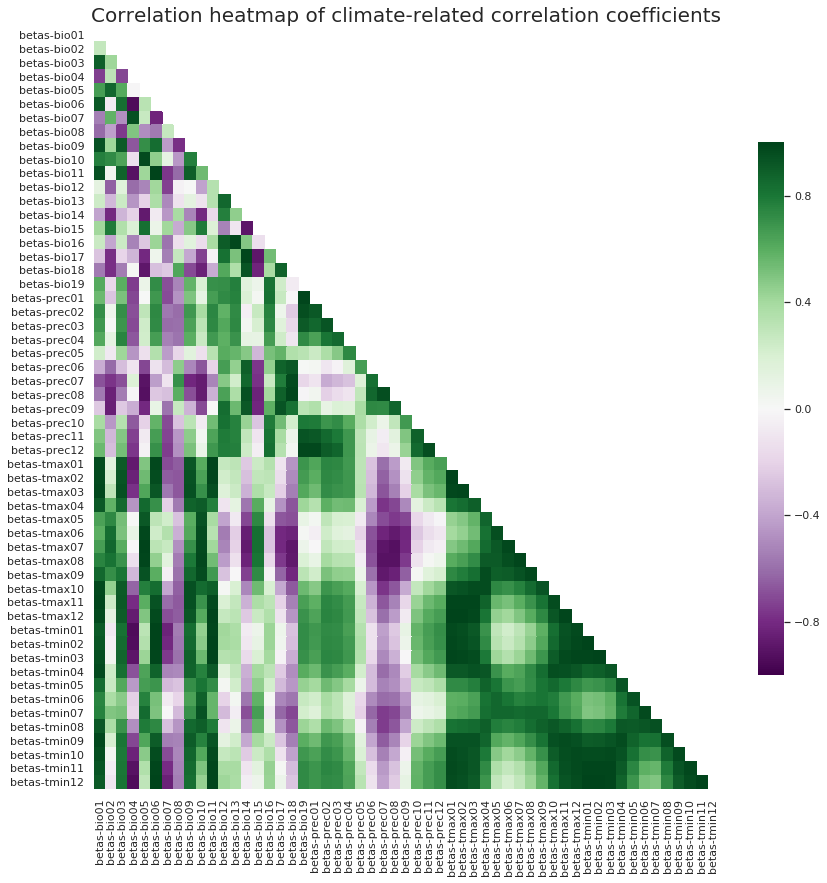

In [12]:
matrix = np.triu(betas4corr.corr())
sns.set(rc={'figure.figsize':(14,14)})
sns.set_style("whitegrid")
sns.heatmap(betas4corr.corr(), vmin=-1, vmax=1, center= 0, cmap= 'PRGn', mask=matrix, cbar_kws={"shrink": .70})
plt.title('Correlation heatmap of climate-related correlation coefficients', fontsize=20)
#plt.savefig('corr_climcorrcoeff.png', bbox_inches='tight')

## Histogramm of fitness-related selection coefficients
### Before SNP selection

In [3]:
# Extract mlp and mli datasets
MLP = betas[['rs', 'rFitness2_mlp']]
MLI = betas[['rs', 'rFitness2_mli']]
THP = betas[['rs', 'rFitness2_thp']]
THI = betas[['rs', 'rFitness2_thi']]

In [4]:
betas2 = pd.read_csv('/Carnegie/DPB/Data/Shared/Labs/Moi/Everyone/deepselection/randomForest/betas_woNAs_Fitness.txt', sep='\t')
betas2.rename(columns={'Fitness_Andaluci':'Fitness_Andalucia'}, inplace=True)
betas2 = betas2[betas2.columns.drop(list(betas2.filter(regex='randomized')))]

,rs,Fitness_Spain,Fitness_UnitedKingdom,Fitness_Finland,Fitness_Andalucia,Fitness_Germany
0,1_540,0.029347,0.031909,-0.114821,0.114385,0.126802
1,1_542,0.027702,0.007016,-0.168156,0.020336,0.138261
2,1_597,-0.057755,-0.095101,0.117915,-0.010308,-0.323298
3,1_603,-0.056234,-0.094282,0.116810,-0.011677,-0.319397
4,1_607,-0.011874,-0.073379,-0.110553,-0.185118,-0.054551
...,...,...,...,...,...,...
1328897,5_26972045,-0.051025,-0.078795,0.109514,-0.014133,-0.265691
1328898,5_26972134,-0.051025,-0.078795,0.109514,-0.014133,-0.265691
1328899,5_26972338,-0.051017,-0.078064,0.109081,-0.014003,-0.262583
1328900,5_26972342,-0.051025,-0.078795,0.109514,-0.014133,-0.265691


In [5]:
AND = betas2[['rs', 'Fitness_Andalucia']]
SPA = betas2[['rs', 'Fitness_Spain']]
UKI = betas2[['rs', 'Fitness_UnitedKingdom']]
FIN = betas2[['rs', 'Fitness_Finland']]
GER = betas2[['rs', 'Fitness_Germany']]

,rs,Fitness_Germany
0,1_540,0.126802
1,1_542,0.138261
2,1_597,-0.323298
3,1_603,-0.319397
4,1_607,-0.054551
...,...,...
1328897,5_26972045,-0.265691
1328898,5_26972134,-0.265691
1328899,5_26972338,-0.262583
1328900,5_26972342,-0.265691


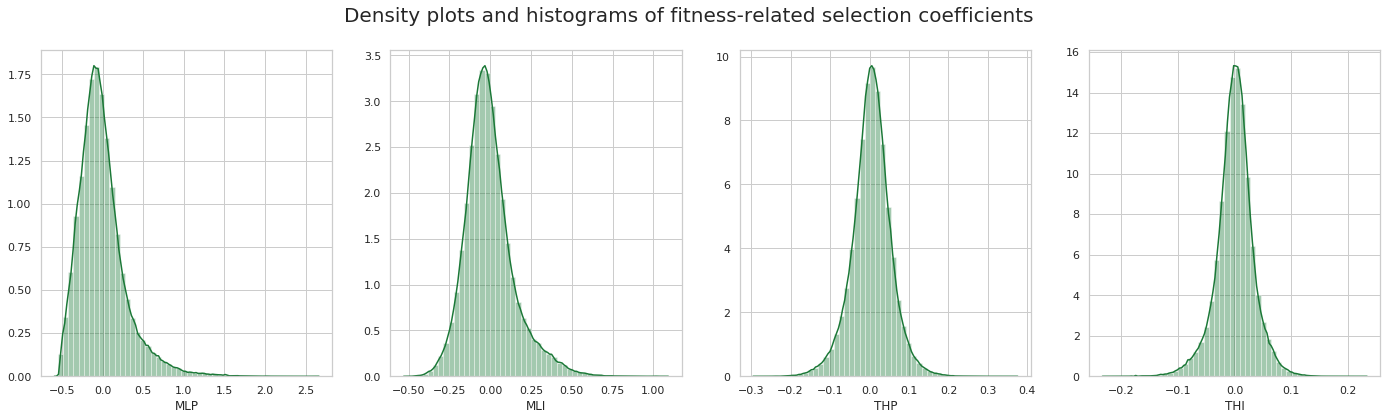

In [6]:
a = MLP['rFitness2_mlp']
b = MLI['rFitness2_mli']
c = THP['rFitness2_thp']
d = THI['rFitness2_thi']

color = '#1b7837'
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (24, 6))
fig.suptitle('Density plots and histograms of fitness-related selection coefficients', size= 20) 
sns.distplot(a, ax=ax1, color=color)
sns.distplot(b, ax=ax2, color=color)
sns.distplot(c, ax=ax3, color=color)
sns.distplot(d, ax=ax4, color=color)
ax1.set_xlabel('MLP')
ax2.set_xlabel('MLI')
ax3.set_xlabel('THP')
ax4.set_xlabel('THI')
fig.show()
#fig.savefig('FitnessBetasDist.png', bbox_inches='tight', dpi=100)

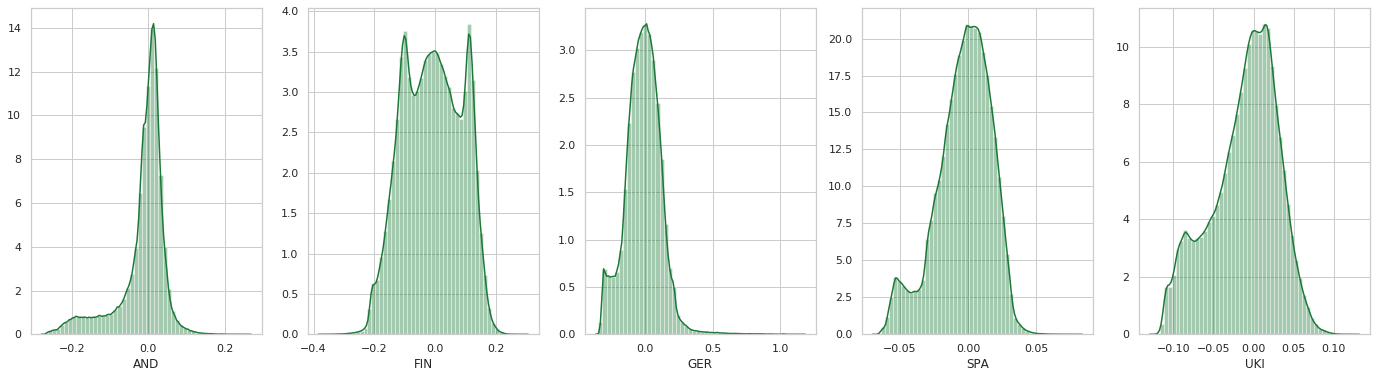

In [7]:
e = AND['Fitness_Andalucia']
f = FIN['Fitness_Finland']
g = GER['Fitness_Germany']
h = SPA['Fitness_Spain']
i = UKI['Fitness_UnitedKingdom']

sns.set_style("whitegrid")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (24, 6))
sns.distplot(e, ax=ax1, color=color)
sns.distplot(f, ax=ax2, color=color)
sns.distplot(g, ax=ax3, color=color)
sns.distplot(h, ax=ax4, color=color)
sns.distplot(i, ax=ax5, color=color)
ax1.set_xlabel('AND')
ax2.set_xlabel('FIN')
ax3.set_xlabel('GER')
ax4.set_xlabel('SPA')
ax5.set_xlabel('UKI')
fig.show()
#fig.savefig('FitnessBetasDist_5locs.png', bbox_inches='tight', dpi=100)

## Histogramm of fitness-related selection coefficients
### After SNP selection

In [8]:
# Sort & select

MLP = MLP.sort_values(by=['rFitness2_mlp'], ascending=False)
MLI = MLI.sort_values(by=['rFitness2_mli'], ascending=False)
THP = THP.sort_values(by=['rFitness2_thp'], ascending=False)
THI = THI.sort_values(by=['rFitness2_thi'], ascending=False)

AND = AND.sort_values(by=['Fitness_Andalucia'], ascending=False)
SPA = SPA.sort_values(by=['Fitness_Spain'], ascending=False)
UKI = UKI.sort_values(by=['Fitness_UnitedKingdom'], ascending=False)
FIN = FIN.sort_values(by=['Fitness_Finland'], ascending=False)
GER = GER.sort_values(by=['Fitness_Germany'], ascending=False)

x=1000

# get the first and last 1000 objects (highest and lowest betas)
selMLP = MLP.iloc[:x, :]   
selMLP = selMLP.append(MLP.iloc[-x:, :])
selMLPSNPs = selMLP['rs'].tolist()

selMLI = MLI.iloc[:x, :]   
selMLI = selMLI.append(MLI.iloc[-x:, :])
selMLISNPs = selMLI['rs'].tolist()

selTHP = THP.iloc[:x, :]   
selTHP = selTHP.append(THP.iloc[-x:, :])
selTHPSNPs = selTHP['rs'].tolist()

selTHI = THI.iloc[:x, :]   
selTHI = selTHI.append(THI.iloc[-x:, :])
selTHISNPs = selTHI['rs'].tolist()

selAND = AND.iloc[:x, :]   
selAND = selAND.append(AND.iloc[-x:, :])
selANDSNPs = selAND['rs'].tolist()

selSPA = SPA.iloc[:x, :]   
selSPA = selSPA.append(SPA.iloc[-x:, :])
selSPASNPs = selSPA['rs'].tolist()

selUKI = UKI.iloc[:x, :]   
selUKI = selUKI.append(UKI.iloc[-x:, :])
selUKISNPs = selUKI['rs'].tolist()

selFIN = FIN.iloc[:x, :]   
selFIN = selFIN.append(FIN.iloc[-x:, :])
selFINSNPs = selFIN['rs'].tolist()

selGER = GER.iloc[:x, :]   
selGER = selGER.append(GER.iloc[-x:, :])
selGERSNPs = selGER['rs'].tolist()

In [9]:
MLP.isnull().sum().sum() 
#MLP.dtypes

0

In [10]:
selGER

,rs,Fitness_Germany
413664,2_6905112,1.162443
600426,3_3238031,1.054452
579039,3_1312881,1.027351
408240,2_6311053,1.027351
407758,2_6275582,1.027351
...,...,...
425600,2_7864816,-0.347934
425135,2_7829542,-0.347934
425136,2_7829572,-0.347934
425532,2_7853755,-0.347934


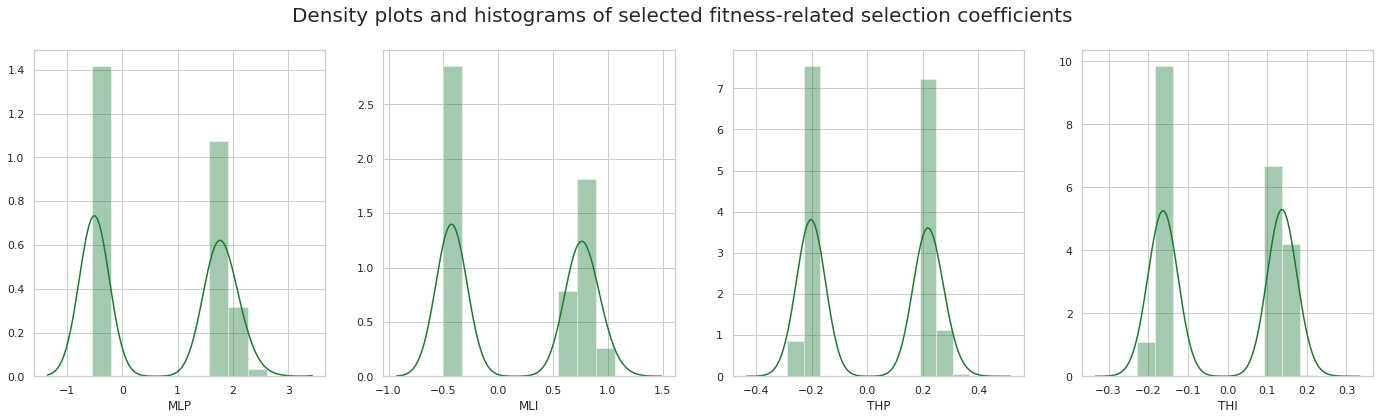

In [11]:
# check distribution of selection

a = selMLP['rFitness2_mlp']
b = selMLI['rFitness2_mli']
c = selTHP['rFitness2_thp']
d = selTHI['rFitness2_thi']

color = '#1b7837'
sns.set_style("whitegrid")
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (24, 6))
fig.suptitle('Density plots and histograms of selected fitness-related selection coefficients', size= 20)
sns.distplot(a, ax=ax1, color=color)
sns.distplot(b, ax=ax2, color=color)
sns.distplot(c, ax=ax3, color=color)
sns.distplot(d, ax=ax4, color=color)
ax1.set_xlabel('MLP')
ax2.set_xlabel('MLI')
ax3.set_xlabel('THP')
ax4.set_xlabel('THI')
fig.show()
#fig.savefig('SelFitnessBetasDist.png', bbox_inches='tight', dpi=100)

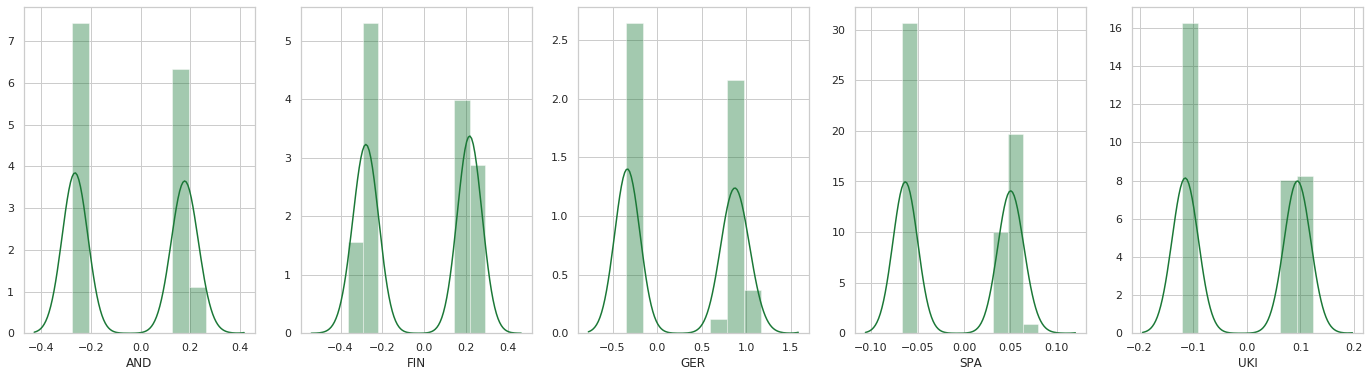

In [12]:
e = selAND['Fitness_Andalucia']
f = selFIN['Fitness_Finland']
g = selGER['Fitness_Germany']
h = selSPA['Fitness_Spain']
i = selUKI['Fitness_UnitedKingdom']

sns.set_style("whitegrid")
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1,5, figsize = (24, 6))
sns.distplot(e, ax=ax1, color=color)
sns.distplot(f, ax=ax2, color=color)
sns.distplot(g, ax=ax3, color=color)
sns.distplot(h, ax=ax4, color=color)
sns.distplot(i, ax=ax5, color=color)
ax1.set_xlabel('AND')
ax2.set_xlabel('FIN')
ax3.set_xlabel('GER')
ax4.set_xlabel('SPA')
ax5.set_xlabel('UKI')
fig.show()
#fig.savefig('SelFitnessBetasDist_5locs.png', bbox_inches='tight', dpi=100)

## Density plot & histogram of target

In [13]:
target = pd.read_csv('/home/esehr/NN_notebook/Input/Target_7locs.csv', delim_whitespace=True)

In [14]:
target

,rs,rFitness,locat
0,5_23952585,1.972198,MLP
1,5_19207915,-0.507355,MLP
2,5_5064538,-0.509385,MLP
3,5_403166,-0.258315,MLP
4,4_96410,-0.507355,MLP
...,...,...,...
148378,4_10081804,-0.097277,UKI
148379,1_24802767,-0.101302,UKI
148380,2_10299311,0.063750,UKI
148381,4_6310499,-0.113975,UKI


Text(0.5, 0, 'All locations combined')

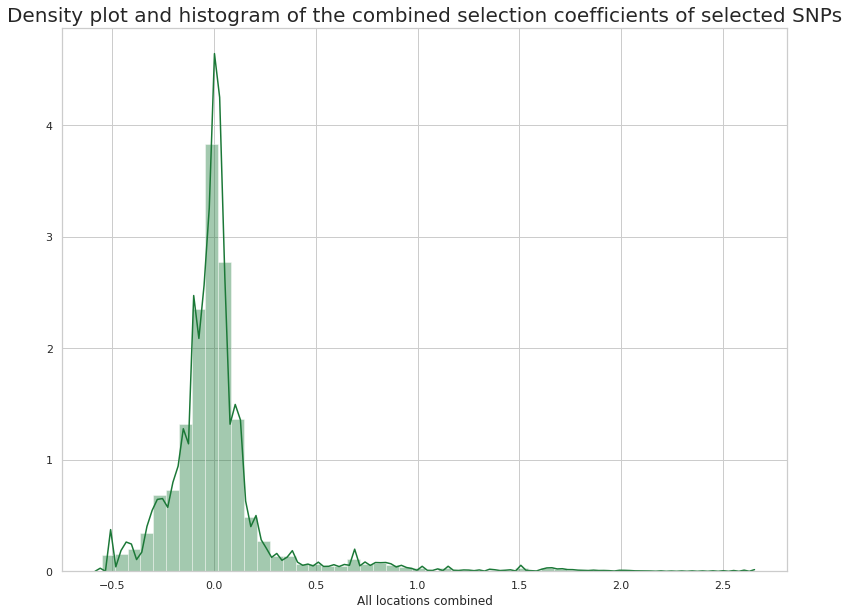

In [15]:
sns.set_style("whitegrid")
sns.distplot(target['rFitness'], color=color)
plt.title('Density plot and histogram of the combined selection coefficients of selected SNPs', size=20)
plt.xlabel('All locations combined')
#plt.savefig('TargetDist.png', bbox_inches='tight')

## EDA of features after SNP selection

In [16]:
predictors = pd.read_csv('/home/esehr/NN_notebook/Input/Predictors_7locs.csv', delim_whitespace=True)

In [17]:
predictors

,rs,clim-bio18,clim-bio19,clim-tmin12,clim-tmin10,clim-tmax8,clim-tmin11,clim-tmax9,clim-bio11,clim-tmax7,clim-bio10,clim-tmax6,clim-bio13,clim-tmax5,clim-bio12,clim-tmax4,clim-tmax3,clim-prec11,clim-bio15,clim-tmax2,clim-bio14,clim-prec10,clim-tmax1,clim-bio17,clim-prec12,clim-bio16,clim-prec4,clim-prec5,clim-prec6,clim-prec7,clim-tmin9,clim-prec1,clim-tmin8,clim-prec2,clim-bio9,clim-prec3,clim-bio8,clim-bio6,clim-tmin4,clim-bio7,clim-tmin5,clim-tmin6,clim-bio4,clim-tmin7,clim-bio5,clim-bio2,clim-prec9,clim-tmin1,clim-tmax12,clim-bio3,clim-prec8,clim-tmax11,clim-tmin2,clim-tmax10,clim-bio1,clim-tmin3,ann,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12,tmin1,tmin2,tmin3,tmin4,tmin5,tmin6,tmin7,tmin8,tmin9,tmin10,tmin11,tmin12,tmax1,tmax2,tmax3,tmax4,tmax5,tmax6,tmax7,tmax8,tmax9,tmax10,tmax11,tmax12
0,5_23952585,-3.087374,-15.905050,-41.629490,-22.382110,-8.573232,-31.311110,-15.684850,-40.406360,-2.675758,-4.841414,-0.178283,-2.262121,-7.393434,-37.55960,-18.73586,-29.60391,-3.462121,2.621212,-36.96263,-1.702020,-4.477273,-37.671720,-10.057070,-5.868687,-9.052525,-2.706566,-5.923232,-7.664141,1.971717,-17.792420,-5.753535,-9.401010,-4.497980,-43.42173,-1.796970,4.713131,-46.398850,-19.406060,43.627270,-12.739900,-4.488384,1333.64400,-3.064141,-2.854545,4.180303,-0.502020,-46.865450,-32.010610,-3.029293,3.121212,-28.695450,-46.260690,-21.086870,-22.044870,-35.178570,6,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
1,5_19207915,-20.611810,11.515270,9.285821,6.858607,17.155190,7.530855,15.444600,11.799280,16.689410,11.087880,12.132690,1.528819,10.283710,-4.15947,12.30071,14.45714,3.720265,2.455499,15.14908,-4.657943,-1.180550,12.767620,-9.747862,1.447149,3.033096,2.900407,2.055397,-1.519348,-8.743075,7.979939,3.586965,7.426477,6.264257,34.45510,1.827699,-5.622200,11.866740,8.291853,4.936660,5.795010,5.372607,-27.17016,6.570367,16.713240,4.928615,-5.301833,11.393050,10.515990,1.078513,-9.216802,10.337880,12.295170,11.154990,10.615310,10.629870,5,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
2,5_5064538,31.367590,13.355320,-17.440370,-11.899180,-21.613240,-13.381650,-23.561350,-20.112510,-20.125770,-14.335120,-15.420500,5.735685,-15.723160,71.39187,-21.22827,-23.56421,6.996933,-2.938906,-24.39596,5.918456,8.018405,-22.210890,17.396730,7.335634,19.608900,-1.373722,-2.708845,5.518149,12.881650,-12.930730,5.445808,-10.498210,0.356084,-38.19228,1.638804,1.270450,-18.877840,-15.289880,-1.301380,-11.999740,-8.897751,203.59020,-9.120910,-20.264060,-6.867587,13.792690,-18.582140,-19.212420,-2.468814,13.490290,-21.491560,-19.976200,-21.302910,-17.491800,-20.201700,12,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
3,5_403166,-11.606060,-2.747475,5.375969,-3.909553,4.837374,-0.525758,6.075758,7.840433,3.650000,-2.564141,-1.359091,-5.551515,-2.923232,-13.52172,2.60303,11.55668,-3.462121,-4.885354,11.02879,1.503030,-4.055556,8.885859,6.811616,-0.723737,-17.739900,3.028788,6.222222,2.204040,-5.956566,-3.622727,-2.211111,-6.364646,-0.027778,33.41700,-1.122222,-7.347980,7.670570,-2.537374,-4.111111,-5.992424,-8.452525,-407.03590,-8.462121,3.471212,6.288889,-1.767172,7.

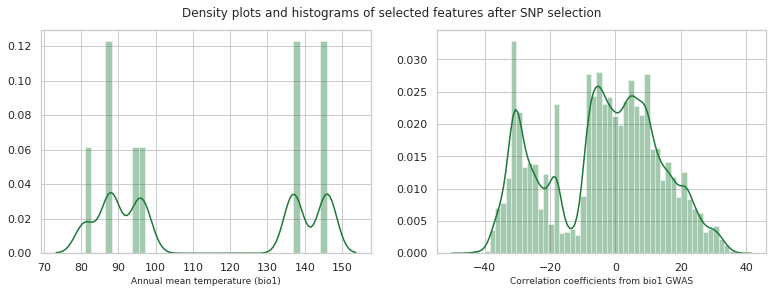

In [46]:
# check distribution of predictors
color = '#1b7837'

b = predictors['bio1']
c = predictors['clim-bio1']

sns.set_style("whitegrid")
fig, (ax2, ax3) = plt.subplots(1,2, figsize = (13, 4))
fig.suptitle('Density plots and histograms of selected features after SNP selection', size=12) 
sns.distplot(b, ax=ax2, color=color)
sns.distplot(c, ax=ax3, color=color)

ax2.set_xlabel("Annual mean temperature (bio1)", size = 9)
ax3.set_xlabel("Correlation coefficients from bio1 GWAS", size = 9)

plt.subplots_adjust(top=0.9)
fig.show()
#fig.savefig('PredVarDist_v2.png', bbox_inches='tight', dpi=100)


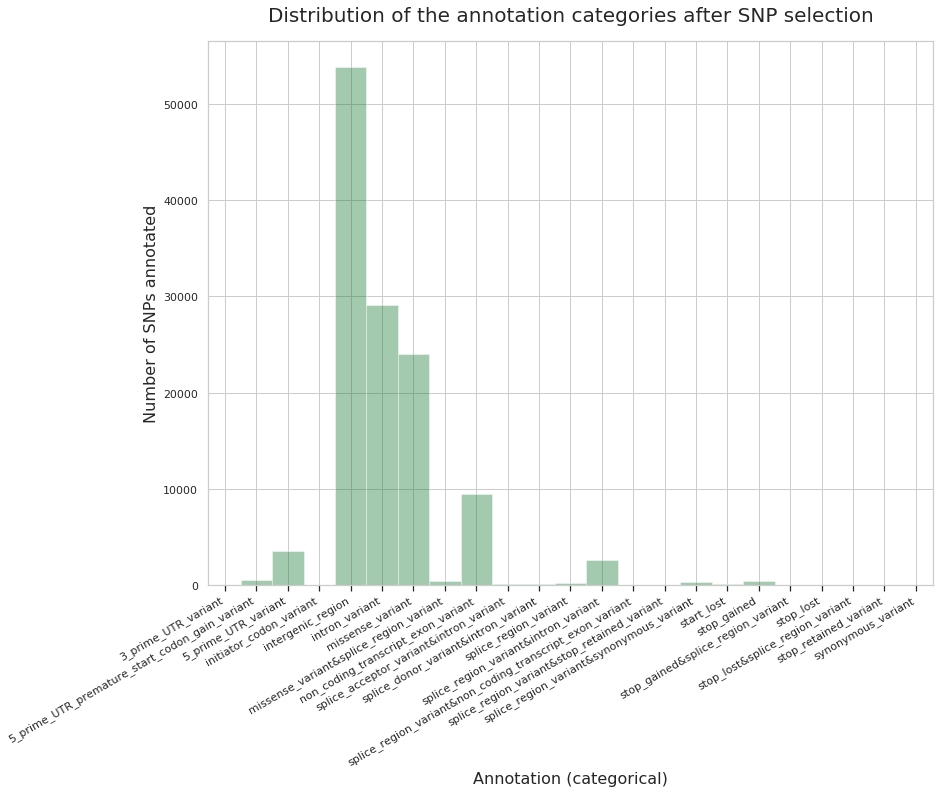

In [41]:
color = '#1b7837'

a = predictors['ann']

sns.set_style("whitegrid")
fig = sns.distplot(a, color = color, bins=np.arange(0.5,22.5), kde=False)
fig.set_title('Distribution of the annotation categories after SNP selection', size=20, pad=20)
fig.set_xlabel("Annotation (categorical)", size= 16)
fig.set_ylabel('Number of SNPs annotated', size = 16)

fig.xaxis.tick_bottom()
fig.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22])
fig.set_xticklabels(['3_prime_UTR_variant', '5_prime_UTR_premature_start_codon_gain_variant', '5_prime_UTR_variant', 
                     'initiator_codon_variant', 'intergenic_region', 'intron_variant', 'missense_variant', 
                      'missense_variant&splice_region_variant', 'non_coding_transcript_exon_variant', 'splice_acceptor_variant&intron_variant', 
                      'splice_donor_variant&intron_variant', 'splice_region_variant', 'splice_region_variant&intron_variant', 
                      'splice_region_variant&non_coding_transcript_exon_variant', 'splice_region_variant&stop_retained_variant', 
                      'splice_region_variant&synonymous_variant', 'start_lost', 'stop_gained', 'stop_gained&splice_region_variant', 
                      'stop_lost', 'stop_lost&splice_region_variant', 'stop_retained_variant', 'synonymous_variant'], rotation=30, ha='right')

#fig.figure.savefig('Annotation_afterSNPsel.png', bbox_inches='tight',dpi=100)


## Heatmap after SNP selection

In [65]:
# subset with sel coeff
climbetas4corr = predictors.iloc[:,1:56].copy()
climbetas4corr

,clim-bio18,clim-bio19,clim-tmin12,clim-tmin10,clim-tmax8,clim-tmin11,clim-tmax9,clim-bio11,clim-tmax7,clim-bio10,clim-tmax6,clim-bio13,clim-tmax5,clim-bio12,clim-tmax4,clim-tmax3,clim-prec11,clim-bio15,clim-tmax2,clim-bio14,clim-prec10,clim-tmax1,clim-bio17,clim-prec12,clim-bio16,clim-prec4,clim-prec5,clim-prec6,clim-prec7,clim-tmin9,clim-prec1,clim-tmin8,clim-prec2,clim-bio9,clim-prec3,clim-bio8,clim-bio6,clim-tmin4,clim-bio7,clim-tmin5,clim-tmin6,clim-bio4,clim-tmin7,clim-bio5,clim-bio2,clim-prec9,clim-tmin1,clim-tmax12,clim-bio3,clim-prec8,clim-tmax11,clim-tmin2,clim-tmax10,clim-bio1,clim-tmin3
0,-3.087374,-15.905050,-41.629490,-22.382110,-8.573232,-31.311110,-15.684850,-40.406360,-2.675758,-4.841414,-0.178283,-2.262121,-7.393434,-37.55960,-18.73586,-29.60391,-3.462121,2.621212,-36.96263,-1.702020,-4.477273,-37.671720,-10.057070,-5.868687,-9.052525,-2.706566,-5.923232,-7.664141,1.971717,-17.792420,-5.753535,-9.401010,-4.497980,-43.42173,-1.796970,4.713131,-46.398850,-19.406060,43.627270,-12.739900,-4.488384,1333.64400,-3.064141,-2.854545,4.180303,-0.502020,-46.865450,-32.010610,-3.029293,3.121212,-28.695450,-46.260690,-21.086870,-22.044870,-35.178570
1,-20.611810,11.515270,9.285821,6.858607,17.155190,7.530855,15.444600,11.799280,16.689410,11.087880,12.132690,1.528819,10.283710,-4.15947,12.30071,14.45714,3.720265,2.455499,15.14908,-4.657943,-1.180550,12.767620,-9.747862,1.447149,3.033096,2.900407,2.055397,-1.519348,-8.743075,7.979939,3.586965,7.426477,6.264257,34.45510,1.827699,-5.622200,11.866740,8.291853,4.936660,5.795010,5.372607,-27.17016,6.570367,16.713240,4.928615,-5.301833,11.393050,10.515990,1.078513,-9.216802,10.337880,12.295170,11.154990,10.615310,10.629870
2,31.367590,13.355320,-17.440370,-11.899180,-21.613240,-13.381650,-23.561350,-20.112510,-20.125770,-14.335120,-15.420500,5.735685,-15.723160,71.39187,-21.22827,-23.56421,6.996933,-2.938906,-24.39596,5.918456,8.018405,-22.210890,17.396730,7.335634,19.608900,-1.373722,-2.708845,5.518149,12.881650,-12.930730,5.445808,-10.498210,0.356084,-38.19228,1.638804,1.270450,-18.877840,-15.289880,-1.301380,-11.999740,-8.897751,203.59020,-9.120910,-20.264060,-6.867587,13.792690,-18.582140,-19.212420,-2.468814,13.490290,-21.491560,-19.976200,-21.302910,-17.491800,-20.201700
3,-11.606060,-2.747475,5.375969,-3.909553,4.837374,-0.525758,6.075758,7.840433,3.650000,-2.564141,-1.359091,-5.551515,-2.923232,-13.52172,2.60303,11.55668,-3.462121,-4.885354,11.02879,1.503030,-4.055556,8.885859,6.811616,-0.723737,-17.739900,3.028788,6.222222,2.204040,-5.956566,-3.622727,-2.211111,-6.364646,-0.027778,33.41700,-1.122222,-7.347980,7.670570,-2.537374,-4.111111,-5.992424,-8.452525,-407.03590,-8.462121,3.471212,6.288889,-1.767172,7.201318,6.618687,2.621717,-5.650505,5.379293,7.808724,4.131818,1.740553,4.313025
4,-33.366400,8.454175,5.302665,-4.060656,9.655499,-1.499389,8.404073,10.676790,8.628513,-1.258554,1.571894,-0.154786,-3.644297,-15.63859,3.21945,12.67143,6.067108,1.894297,17.59796,-4.402851,1.166293,13.992060,-8.829532,3.998065,-2.170774,4.737067,3.279837,-5.396741,-13.589820,-4.621589,0.729939,-7.419857,3.509267,47.61837,-1.947658,-29.192670,8.907187,-4.513747,-0.114155,-9.510489,-10.392060,-460.57090,-9.755499,8.703360,9.928411,-4.791650,8.433742,10.311910,3.425356,-13.400310,8.450204,9.284600,6.512322,2.911224,6.340890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148378,-38.540820,-36.484660,-60.429800,-36.045660,1.130832,-47.210830,-5.183950,-57.191570,3.220208,-6.258367,0.752535,-4.727181,-4.163032,-126.54720,-10.44916,-36.85925,-19.375890,12.137800,-50.78930,-10.177480,-16.012680,-52.538670,-34.275610,-16.266480,-20.733520,2.088362,0.001902,-11.421400,-10.574920,-28.026880,-13.208040,-17.145540,-7.226166,-50.54268,0.651623,-15.571120,-68.969710,-17.325300,72.089250,-13.257350,-12.318840,1953.49100,-11.92622

In [66]:
climbetas4corr = climbetas4corr.reindex(sorted(climbetas4corr.columns), axis=1)

In [67]:
climbetas4corr.columns = ['clim-bio01', 'clim-bio10', 'clim-bio11', 'clim-bio12', 'clim-bio13',
       'clim-bio14', 'clim-bio15', 'clim-bio16', 'clim-bio17', 'clim-bio18',
       'clim-bio19', 'clim-bio02', 'clim-bio03', 'clim-bio04', 'clim-bio05',
       'clim-bio06', 'clim-bio07', 'clim-bio08', 'clim-bio09', 'clim-prec01',
       'clim-prec10', 'clim-prec11', 'clim-prec12', 'clim-prec02', 'clim-prec03',
       'clim-prec04', 'clim-prec05', 'clim-prec06', 'clim-prec07', 'clim-prec08',
       'clim-prec09', 'clim-tmax01', 'clim-tmax10', 'clim-tmax11', 'clim-tmax12',
       'clim-tmax02', 'clim-tmax03', 'clim-tmax04', 'clim-tmax05', 'clim-tmax06',
       'clim-tmax07', 'clim-tmax08', 'clim-tmax09', 'clim-tmin01', 'clim-tmin10',
       'clim-tmin11', 'clim-tmin12', 'clim-tmin02', 'clim-tmin03', 'clim-tmin04',
       'clim-tmin05', 'clim-tmin06', 'clim-tmin07', 'clim-tmin08', 'clim-tmin09']

In [68]:
climbetas4corr = climbetas4corr.reindex(sorted(climbetas4corr.columns), axis=1)

In [69]:
climbetas4corr.columns = ['betas-bio01', 'betas-bio02', 'betas-bio03', 'betas-bio04', 'betas-bio05',
       'betas-bio06', 'betas-bio07', 'betas-bio08', 'betas-bio09', 'betas-bio10',
       'betas-bio11', 'betas-bio12', 'betas-bio13', 'betas-bio14', 'betas-bio15',
       'betas-bio16', 'betas-bio17', 'betas-bio18', 'betas-bio19', 'betas-prec01',
       'betas-prec02', 'betas-prec03', 'betas-prec04', 'betas-prec05',
       'betas-prec06', 'betas-prec07', 'betas-prec08', 'betas-prec09',
       'betas-prec10', 'betas-prec11', 'betas-prec12', 'betas-tmax01',
       'betas-tmax02', 'betas-tmax03', 'betas-tmax04', 'betas-tmax05',
       'betas-tmax06', 'betas-tmax07', 'betas-tmax08', 'betas-tmax09',
       'betas-tmax10', 'betas-tmax11', 'betas-tmax12', 'betas-tmin01',
       'betas-tmin02', 'betas-tmin03', 'betas-tmin04', 'betas-tmin05',
       'betas-tmin06', 'betas-tmin07', 'betas-tmin08', 'betas-tmin09',
       'betas-tmin10', 'betas-tmin11', 'betas-tmin12']

In [70]:
# subset with clima
clim4corr = predictors.iloc[:,57:].copy()
clim4corr

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19,prec1,prec2,prec3,prec4,prec5,prec6,prec7,prec8,prec9,prec10,prec11,prec12,tmin1,tmin2,tmin3,tmin4,tmin5,tmin6,tmin7,tmin8,tmin9,tmin10,tmin11,tmin12,tmax1,tmax2,tmax3,tmax4,tmax5,tmax6,tmax7,tmax8,tmax9,tmax10,tmax11,tmax12
0,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
1,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
2,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
3,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
4,137.0,104.0,35.0,6594.0,308.0,13.0,295.0,95.0,225.0,225.0,56.0,435.0,53.0,11.0,35.0,149.0,52.0,52.0,129.0,42.0,40.0,35.0,44.0,44.0,29.0,11.0,12.0,29.0,49.0,53.0,47.0,13.0,17.0,45.0,65.0,100.0,141.0,173.0,170.0,139.0,94.0,48.0,21.0,87.0,109.0,146.0,176.0,215.0,267.0,308.0,297.0,254.0,189.0,130.0,91.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148378,95.0,74.0,34.0,4988.0,215.0,1.0,214.0,41.0,59.0,161.0,33.0,664.0,62.0,47.0,8.0,180.0,149.0,172.0,167.0,58.0,47.0,52.0,50.0,53.0,57.0,54.0,61.0,56.0,54.0,60.0,62.0,1.0,6.0,25.0,46.0,75.0,106.0,125.0,119.0,96.0,65.0,30.0,13.0,55.0,63.0,96.0,124.0,163.0,196.0,215.0,208.0,179.0,136.0,89.0,66.0
148379,95.0,74.0,34.0,4988.0,215.0,1.0,214.0,41.0,59.0,161.0,33.0,664.0,62.0,47.0,8.0,180.0,149.0,172.0,167.0,58.0,47.0,52.0,50.0,53.0,57.0,54.0,61.0,56.0,54.0,60.0,62.0,1.0,6.0,25.0,46.0,75.0,106.0,125.0,119.0,96.0,65.0,30.0,13.0,55.0,63.0,96.0,124.0,163.0,196.0,215.0,208.0,179.0,136.0,89.0,66.0
148380,95.0,74.0,34.0,4988.0,215.0,1.0,214.0,41.0,59.0,161.0,33.0,664.0,62.0,47.0,8.0,180.0,149.0,172.0,167.0,58.0,47.0,52.0,50.0,53.0,57.0,54.0,61.0,56.0,54.0,60.0,62.0,1.0,6.0,25.0,46.0,75.0,106.0,125.0,119.0,96.0,65.0,30.0,13.0,55.0,63.0,96.0,124.0,163.0,196.0,215.0,208.0,179.0,136.0,89.0,66.0
148381,95.0,74.0,34.0,4988.0,215.0,1.0,214.0,41.0,59.0,161.0,33.0,664.0,62.0,47.0,8.0,180.0,149.0,172.0,167.0,58.0,47.0,52.0,50.0,53.0,57.0,54.0,61.0,56.0,54.0,60.0,62.0,1.0,6.0,25.0,46.0,75.0,106.0,125.0,119.0,96.0,65.0,30.0,13.0,55.0,63.0,96.0,124.0,163.0,196.0,215.0,208.0,179.0,136.0,89.0,66.0


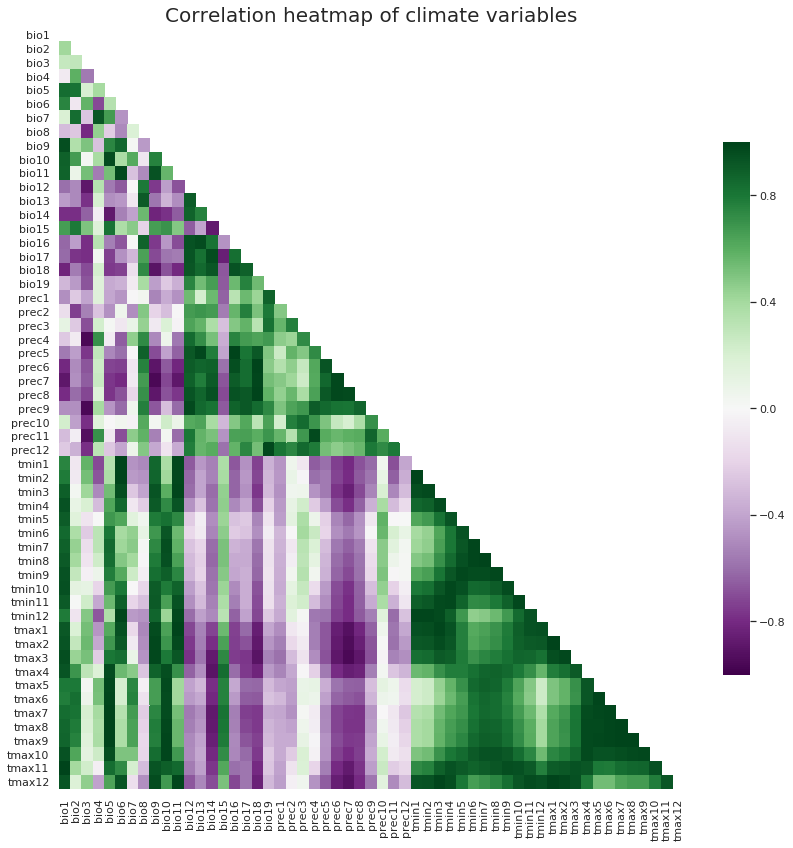

In [100]:
matrix = np.triu(clim4corr.corr())
sns.set(rc={'figure.figsize':(14,14)})
sns.set_style("whitegrid")
sns.heatmap(clim4corr.corr(), vmin=-1, vmax=1, center= 0, cmap= 'PRGn', mask=matrix, cbar_kws={"shrink": .70})
plt.title('Correlation heatmap of climate variables', fontsize=20)
#plt.savefig('corr_clima.png', bbox_inches='tight', dpi=100)

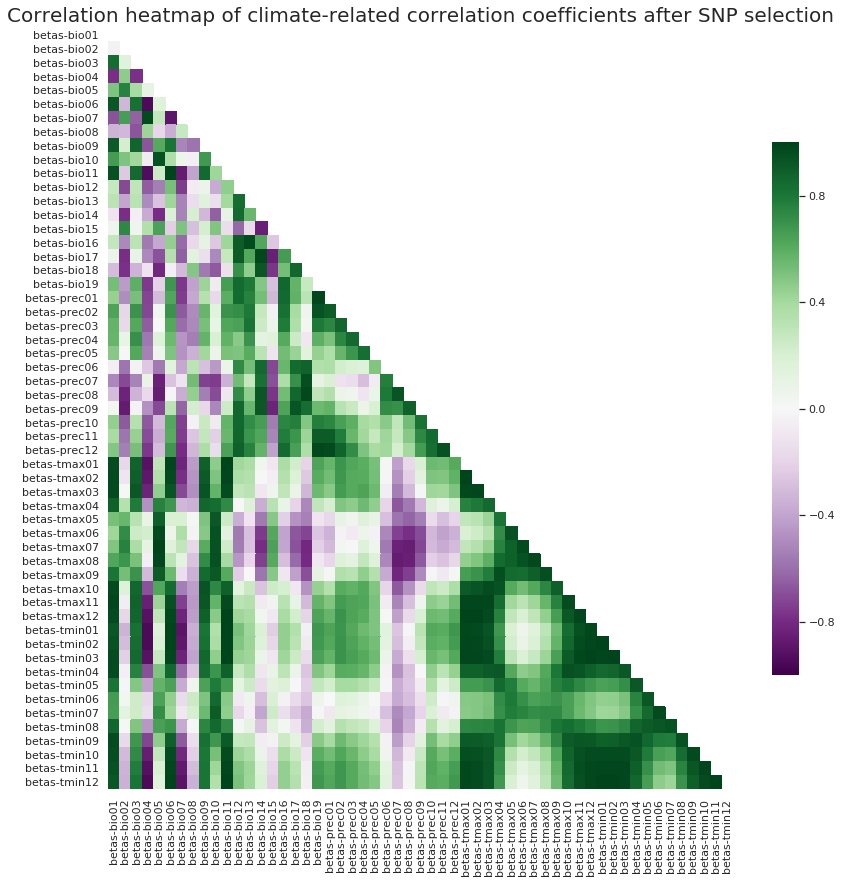

In [72]:
matrix = np.triu(climbetas4corr.corr())
sns.set(rc={'figure.figsize':(14,14)})
sns.set_style("whitegrid")
sns.heatmap(climbetas4corr.corr(), vmin=-1, vmax=1, center= 0, cmap= 'PRGn', mask=matrix, cbar_kws={"shrink": .70})
plt.title('Correlation heatmap of climate-related correlation coefficients after SNP selection', fontsize=20)
#plt.savefig('corr_climabetas_afterSNPsel.png', bbox_inches='tight', dpi=100)